# Supervised Learning

Supervised learning is a type of machine learning which differenciates itself from other subsets of artificial intelligence by using a labled dataset with inputs and their  corresponding outputs which are used to train and test the data to predict new/ unseen data.  

 Labeled data is data which has a corresponding and known output or target variable. 

## Understanding the process

1. Data: First we need to find a data set which is suitable for using supervised learning. This data needs the correct features (input data and target varible/ output data)  
2. Model Selection: Before we start to make a machine learning model we will need to pick a problem based on out needs, these include: dataset size, type of problem and the complexity of the model.
3. Using the loss function: While training your model you can use a loss function to understand the differencce between the predicted outcome and the actual outcome.
4. Training Process: The training process includes a series of tests by the model and each time this test is run used to refine is called a epoch
5. Model Evaluation: After defining our losses and training our model through a series of epochs we can evalute our model while using tools such as the confusion matrix.
6. Hyperperameter tuning: These are different settings in a model which will dictate the rate and learning process of the model. 
7. Convergence: The training process which continues unitl the model's performance is satisfactory and there is minimal loss or the need number of epochs is reached. 

## Making a Supervised Model

First we will want to import the neccessary packages. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Next we will need to load our data set into the file.

In [4]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

After loading in our dataset we will need to sperate the training data and testing data so the model has ample data to work with.

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Next, we need to choose a model that would best fit our data set and the first model will be Decision Tree Classifier Model. 

Like we had reviewed earlier there are many reasons to use this model and some of the advantages of using this model are its interpretability, it has the ability to easily find features and realtionships in non-linear data. One major pitfall of the decison tree is that it can be prone to over fiting

Over Fitting: this is when a model gets so good at recognizing the training data which forces it to generalize any new data it is introduced to. 

In [6]:
# Create a Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()

After choosing a model we need to start the training process this will start by creating a place to store our training progress and then running our training process

In [7]:
# Lists to store training progress
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Training process
epochs = 50
for epoch in range(epochs):
    # Train the model on the training data
    dt_classifier.fit(X_train, y_train)
    
    # Make predictions on training and testing data
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    
    # Calculate training and testing accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Add accuracy values to the lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    
    # Calculate training and testing loss (optional - here we use accuracy as loss for simplicity)
    train_loss.append(1 - train_acc)
    test_loss.append(1 - test_acc)

Lastly we will need to plot the training data which we will test against our testing data.

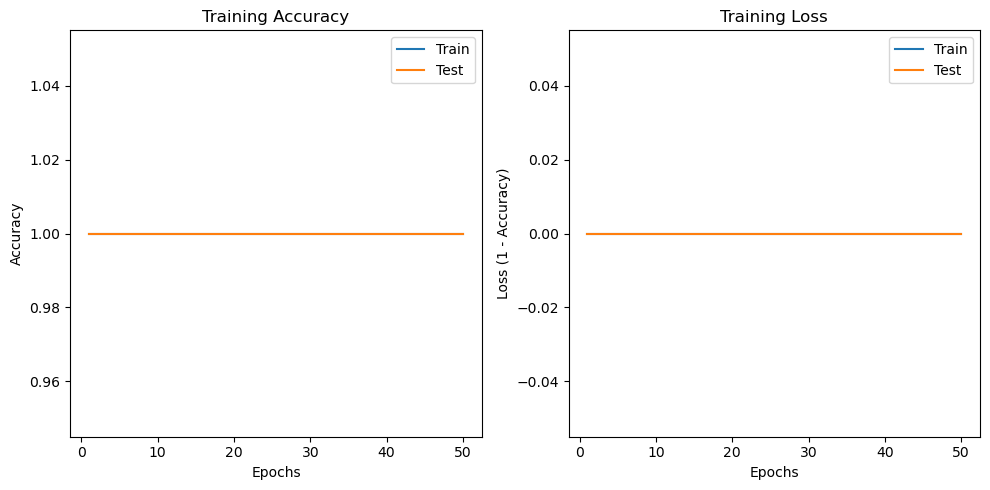

In [8]:
# Plot the training progress
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracy, label='Train')
plt.plot(range(1, epochs + 1), test_accuracy, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_loss, label='Train')
plt.plot(range(1, epochs + 1), test_loss, label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss (1 - Accuracy)')
plt.title('Training Loss')
plt.legend()

plt.tight_layout()
plt.show()

Lastly, we must test our data to see how accurate our model is at predicitng new data. 

In [9]:
# Make predictions on the training and testing data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 1.00


From this result we can tell that our testing data is performing just as well as our training data meaning our model is successful at prediciting new data with the data we currently have. This test has proven that our model works but there is one major flaw, the model will have a much lower rate of success if there is an entirely new species of plant it needs to classify as it will come across the issue of overfitting as we had mentioned earlier.